In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

## Grid Setup

In [2]:
N = 200
x_start, x_end = -6.0, 6.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

## Vortex Setup

In [3]:
a_vortex = 0.4 # Spacing between Vortex
N_vortex = (x_end - x_start) / a_vortex + 1 # Number of Vortices
gamma = 1 # Strength of Vortex

x_vortex = numpy.arange(x_start, x_end + a_vortex, a_vortex)
y_vortex = numpy.zeros(int(N_vortex), dtype=float)

In [18]:
def get_vortex_velocity(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

## Vortex Arrays

In [19]:
u_tot = numpy.zeros((N,N), dtype=float)
v_tot = numpy.zeros((N,N), dtype=float)

In [22]:
for i in range(x_vortex.size):
    u_vortex, v_vortex = get_vortex_velocity(gamma, x_vortex[i], y_vortex[i], X, Y)
    
    u_tot = u_tot + u_vortex
    v_tot = v_tot + v_vortex  
    

## Plot

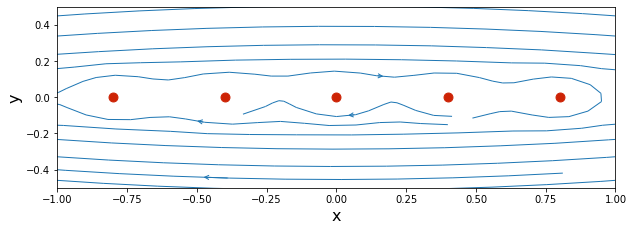

In [25]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-.5, .5)
pyplot.streamplot(X, Y, u_tot, v_tot,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## Infinite Row of Vortices

In [28]:
g = gamma / (2*a_vortex)
x_tg = (2*numpy.pi*X) / a_vortex
y_tg = (2*numpy.pi*Y) / a_vortex

u_inf = + g * numpy.sinh(y_tg) / (numpy.cosh(y_tg) - numpy.cos(x_tg))
v_inf = - g * numpy.sin(x_tg) / (numpy.cosh(y_tg) - numpy.cos(x_tg))

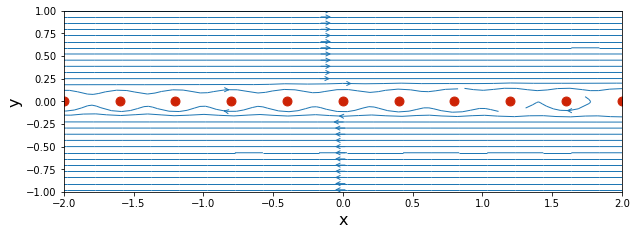

In [31]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-2.0, 2.0)
pyplot.ylim(-1.0, 1.0)
pyplot.streamplot(X, Y, u_inf, v_inf,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');